In [1]:
import json
import random
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Generowanie danych postaci
teams = ['A', 'B']
team_weights = [2/3, 1/3]
score_values = [0, 1, 2, 3]

data = []
for _ in range(10):
    team = random.choices(teams, weights=team_weights, k=1)[0]
    n1 = random.choice(score_values)
    n2 = random.choice(score_values)
    result = f"{n1}-{n2}"
    points = 3 if n1 > n2 else 1 if n1 == n2 else 0

    data.append({"druzyna": team, "wynik": result, "punkty": points})


In [5]:
# Zapis do pliku JSON
json_filename = "druzyny.json"
with open(json_filename, "w") as json_file:
    json.dump(data, json_file, indent=4)


In [7]:
# Odczyt pliku JSON do ramki danych
df = pd.read_json(json_filename)

In [9]:
# Dodanie kolumny "bilans"
df['bilans'] = df['wynik'].apply(lambda x: int(x.split('-')[0]) - int(x.split('-')[1]))

In [11]:
# Agregacja wyników dla drużyn A i B
team_results = df.groupby(['druzyna', 'punkty']).size().unstack(fill_value=0)

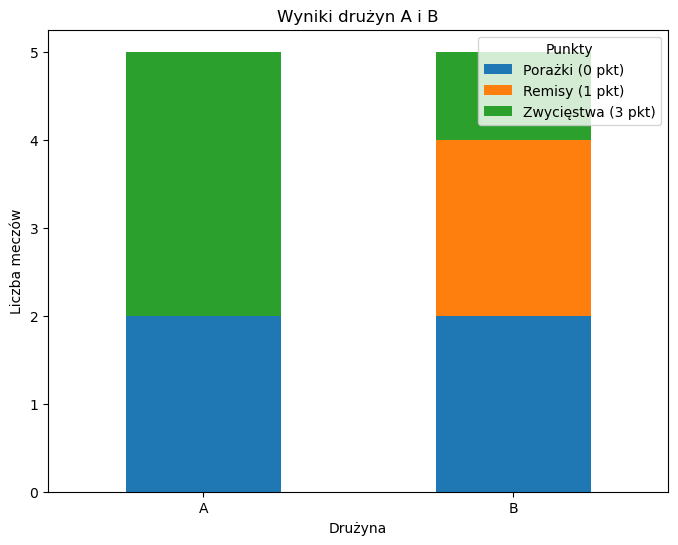

In [13]:
# Wizualizacja wyników
team_results.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel("Drużyna")
plt.ylabel("Liczba meczów")
plt.title("Wyniki drużyn A i B")
plt.xticks(rotation=0)
plt.legend(title="Punkty", labels=["Porażki (0 pkt)", "Remisy (1 pkt)", "Zwycięstwa (3 pkt)"])
plt.show()

In [15]:
# Wyświetlenie ramki danych
print(df)

  druzyna wynik  punkty  bilans
0       A   1-2       0      -1
1       A   1-3       0      -2
2       B   1-1       1       0
3       A   3-1       3       2
4       B   1-3       0      -2
5       A   1-0       3       1
6       B   1-0       3       1
7       A   3-1       3       2
8       B   2-2       1       0
9       B   0-1       0      -1
